In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split

In [37]:
file_path = r"C:\Users\Aaren\Downloads\DSA Maersk\Airline Passenger Satisfaction.csv"

df_original = pd.read_csv(file_path)

In [38]:
df_original.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied,9
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied,10


In [39]:
#making a copy of the entire dataframe

df_eda = df_original.copy()

#removing the unnamned column
df_eda.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
df_eda.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied,9
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied,10


In [40]:
df_eda.describe()

# some mathematical insights of the data

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction score
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,7.222020
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,2.267883
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,5.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,7.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,9.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,10.000000


In [41]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Inflight wifi service              129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Ease of Online booking             129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Food and drink                     129880 non-null  

In [42]:
cat_columns = df_eda.select_dtypes(object).columns.to_list()
print("Categorical: ", cat_columns)

print()

num_columns = df_eda.select_dtypes(np.number).columns.to_list()
print("Numerical: ", num_columns)

Categorical:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

Numerical:  ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction score']


We have 2 types of data here ^

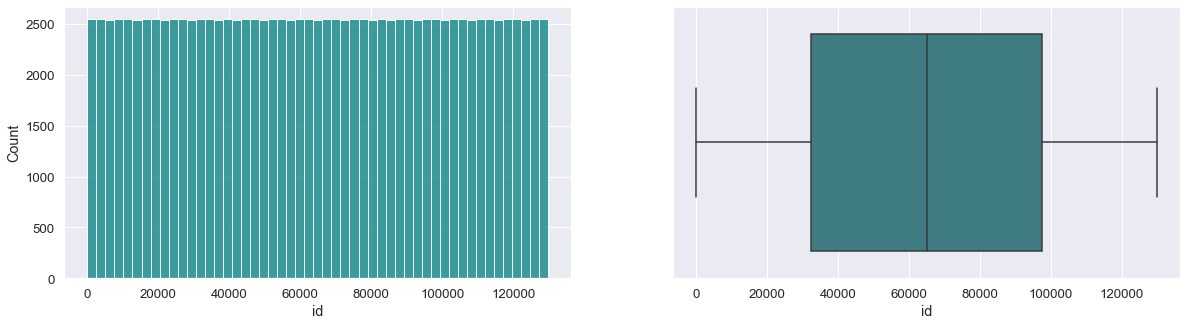

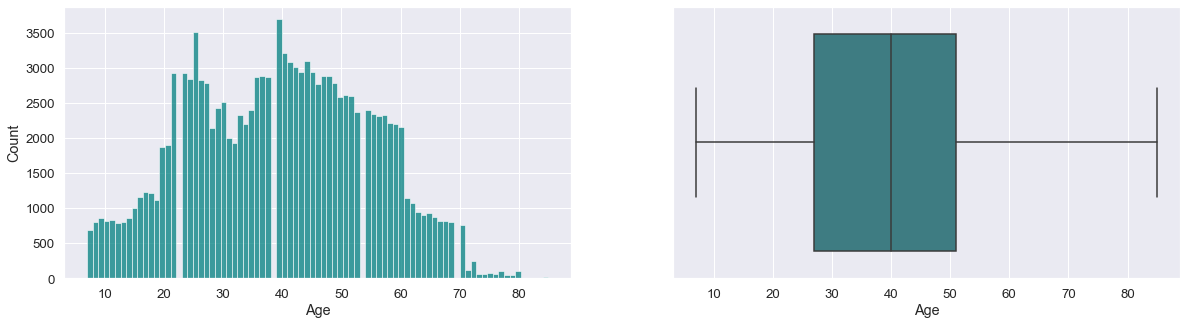

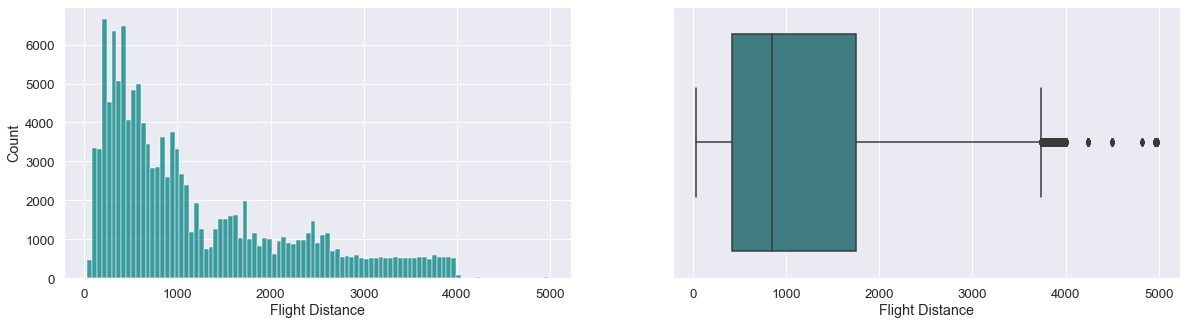

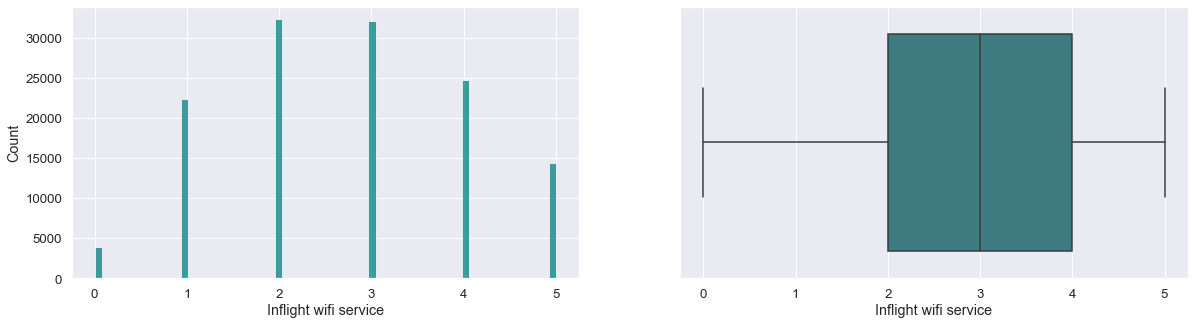

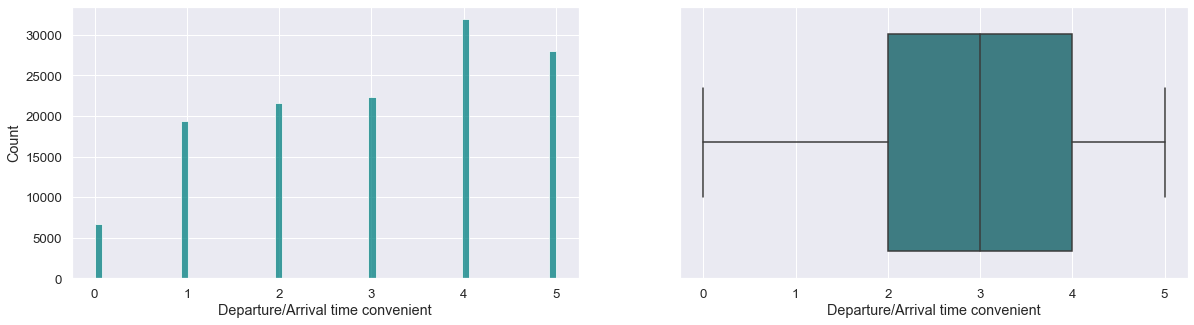

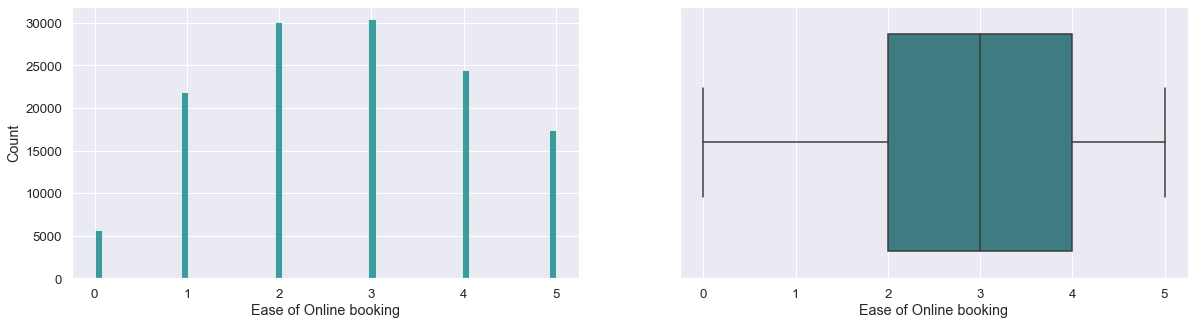

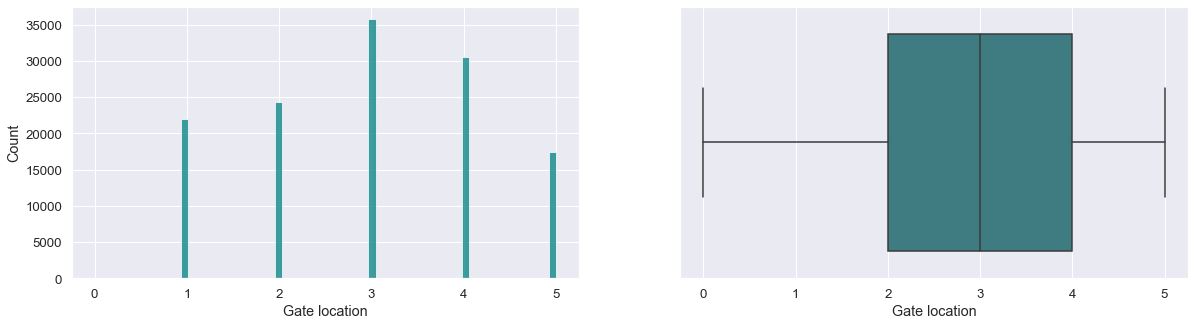

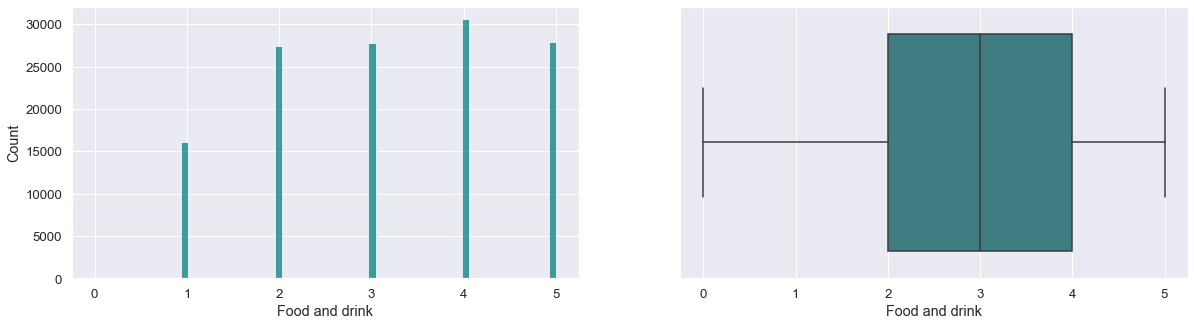

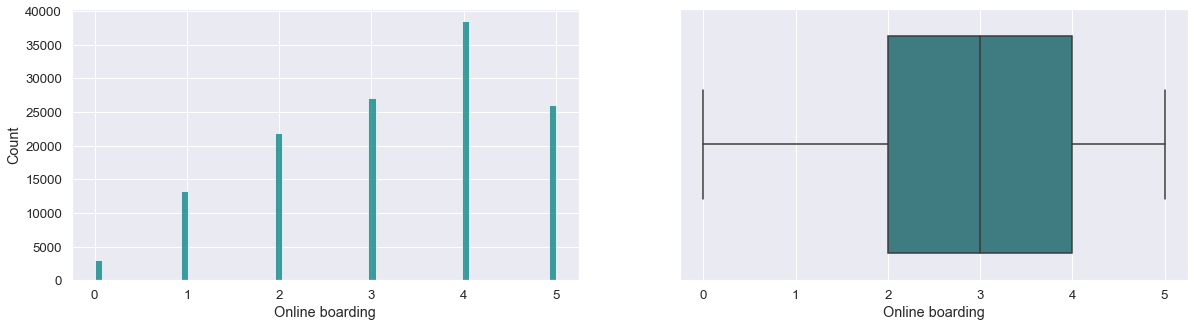

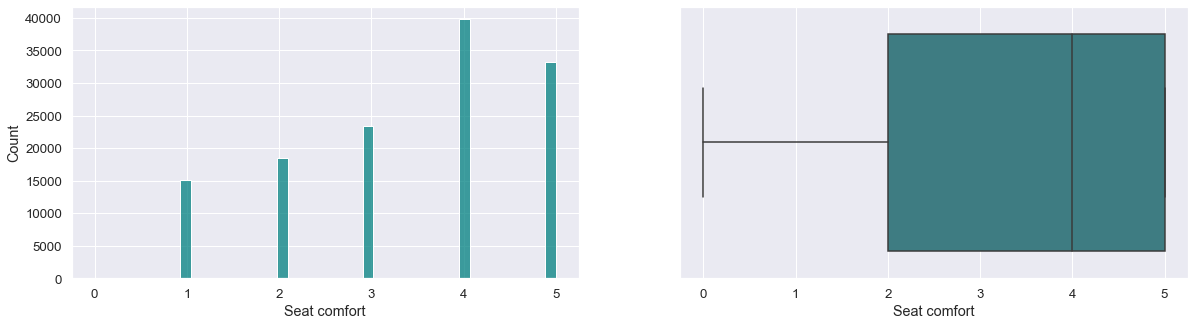

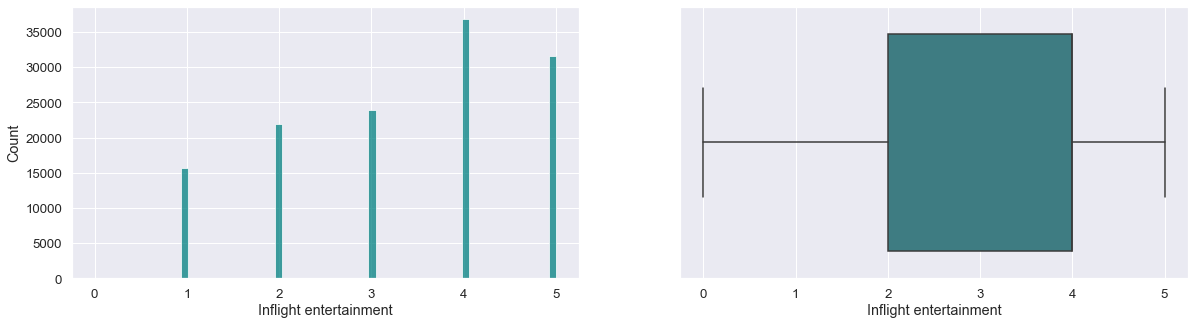

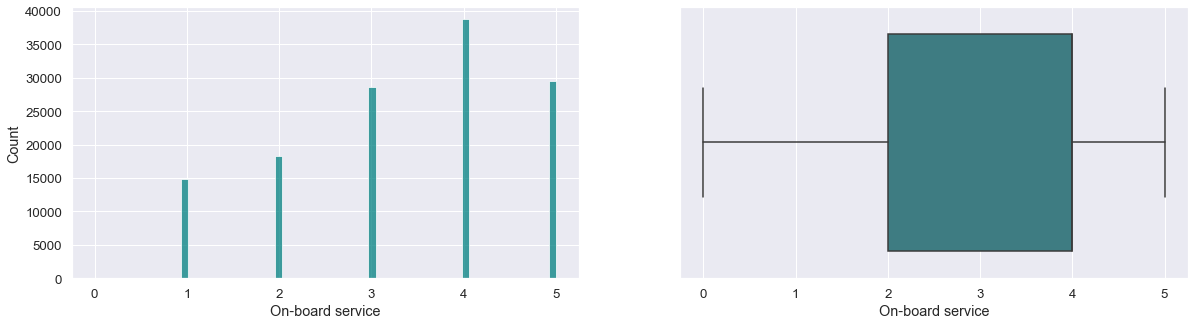

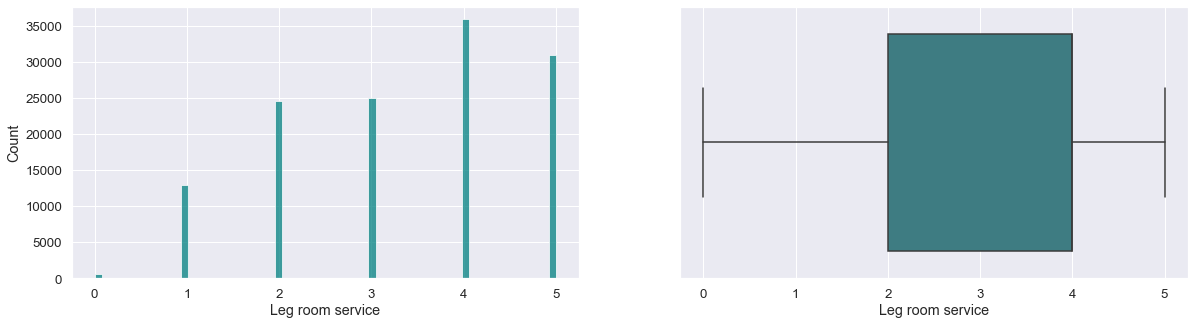

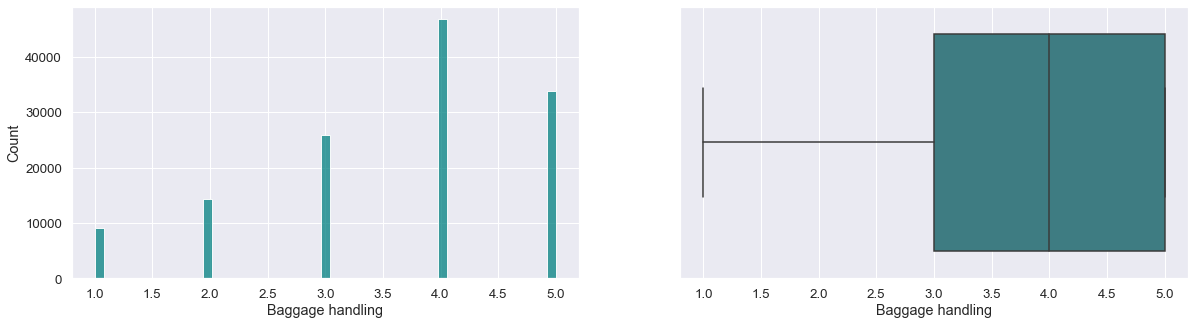

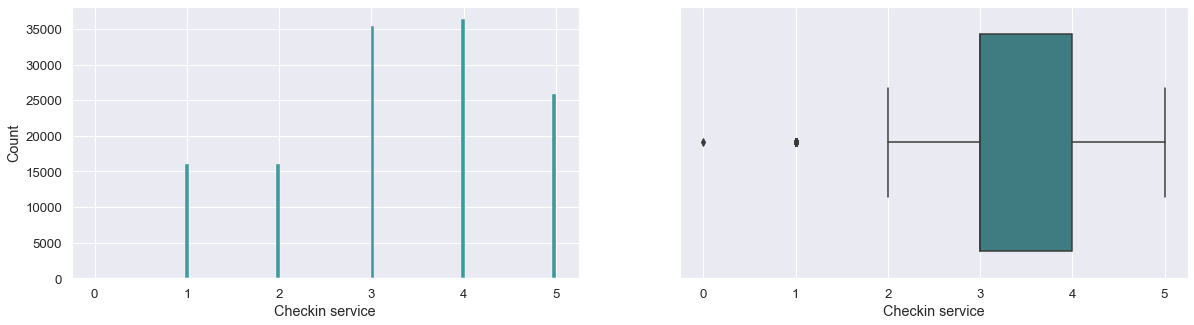

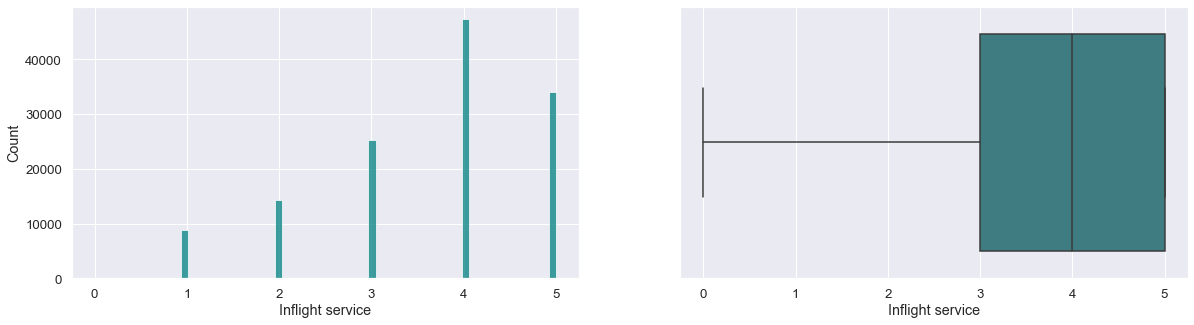

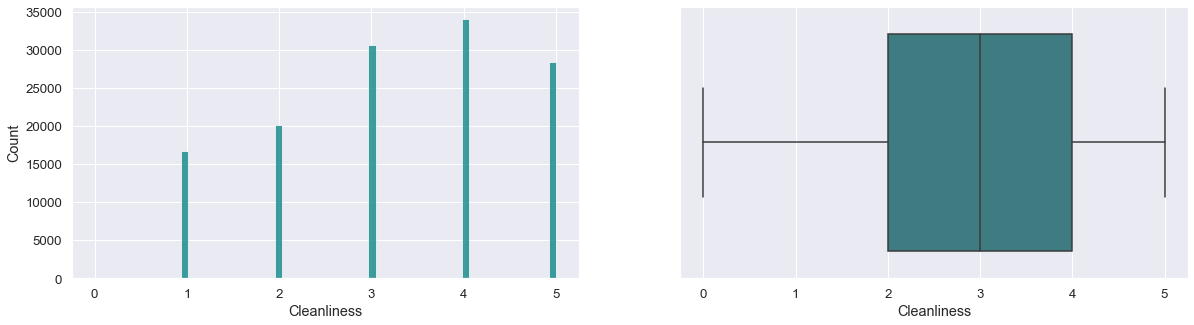

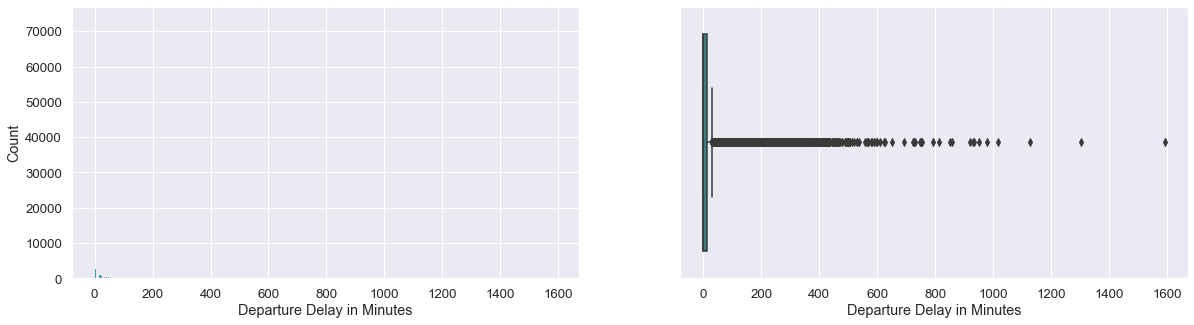

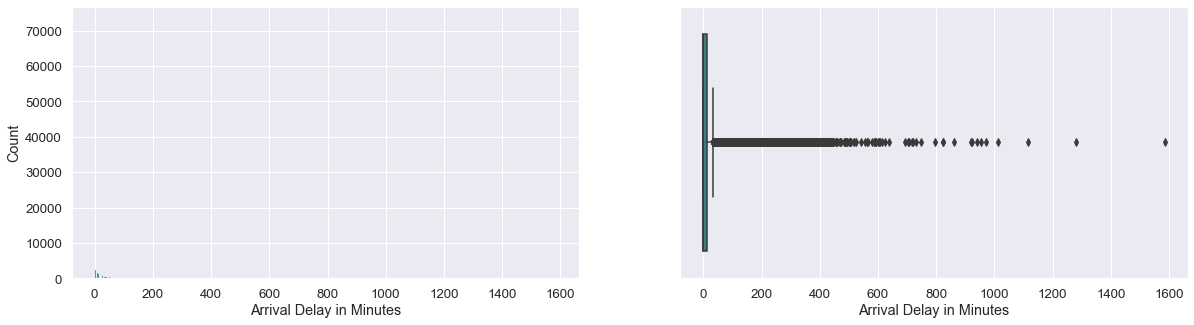

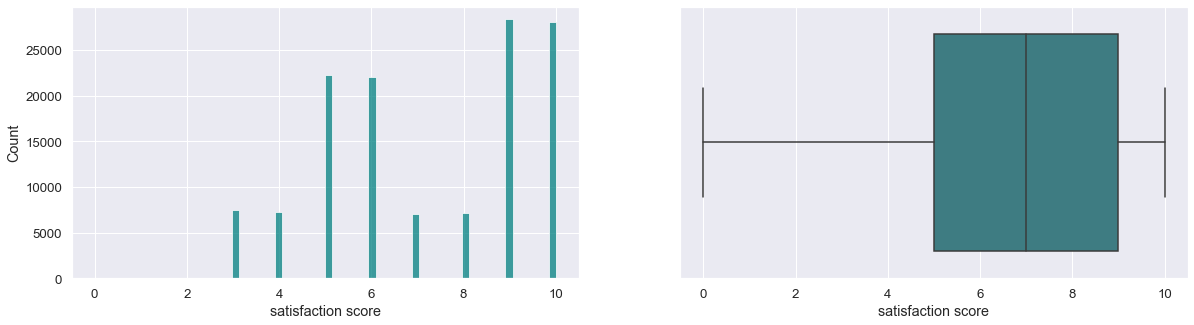

In [43]:
sns.set_context('notebook', font_scale= 1.2)

for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(df_eda[col], ax = ax[0], color = 'teal')
    sns.boxplot(x = df_eda[col], ax= ax[1], palette = 'crest')

Flight Distance has some outliers, should they be removed? Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

Departure delay and Arrival delay distributions seem to be heavily skewed

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

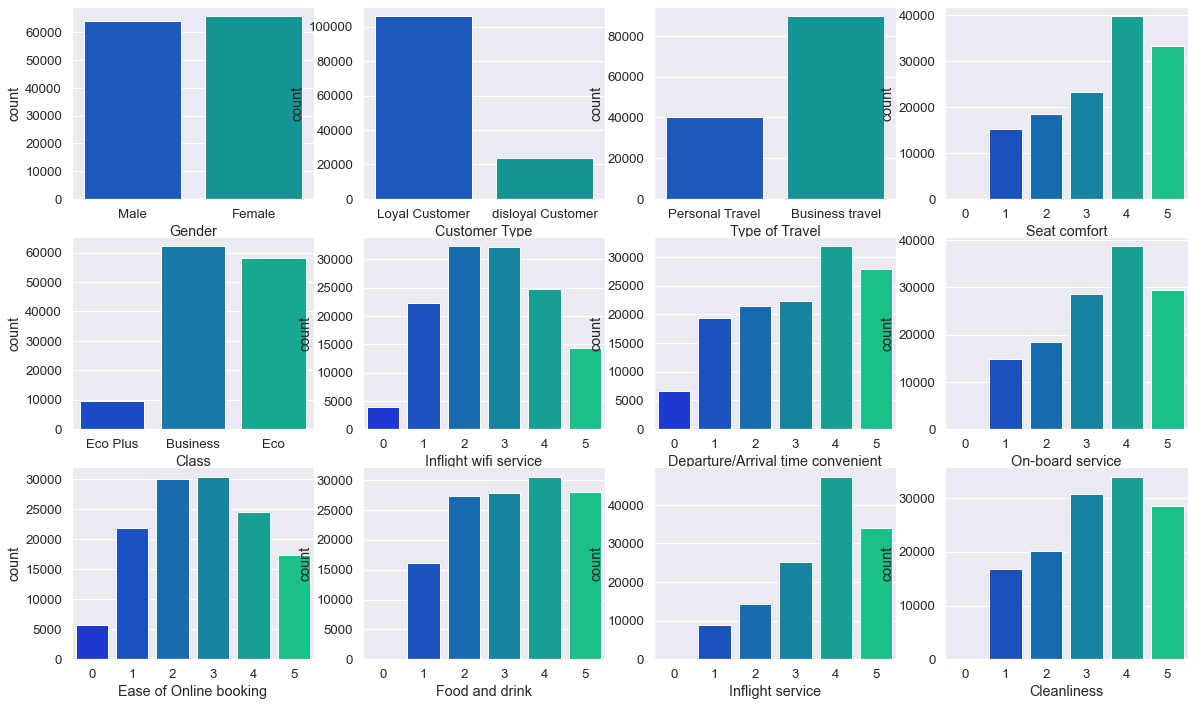

In [44]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = df_eda, palette= 'winter', ax = axes[0, 0])
sns.countplot(x = 'Customer Type', data = df_eda, palette= 'winter', ax = axes[0, 1])
sns.countplot(x = 'Type of Travel', data = df_eda, palette= 'winter', ax = axes[0, 2])
sns.countplot(x = 'Seat comfort', data = df_eda, palette= 'winter', ax = axes[0, 3])
sns.countplot(x = 'Class', data = df_eda, palette= 'winter', ax = axes[1, 0])
sns.countplot(x = 'Inflight wifi service', data = df_eda, palette= 'winter', ax = axes[1, 1])
sns.countplot(x = 'Departure/Arrival time convenient', data = df_eda, palette= 'winter', ax = axes[1, 2])
sns.countplot(x = 'On-board service', data = df_eda, palette= 'winter', ax = axes[1, 3])
sns.countplot(x = 'Ease of Online booking', data = df_eda, palette= 'winter', ax = axes[2, 0])
sns.countplot(x = 'Food and drink', data = df_eda, palette= 'winter', ax = axes[2, 1])
sns.countplot(x = 'Inflight service', data = df_eda, palette= 'winter', ax = axes[2, 2])
sns.countplot(x = 'Cleanliness', data = df_eda, palette= 'winter', ax = axes[2, 3])

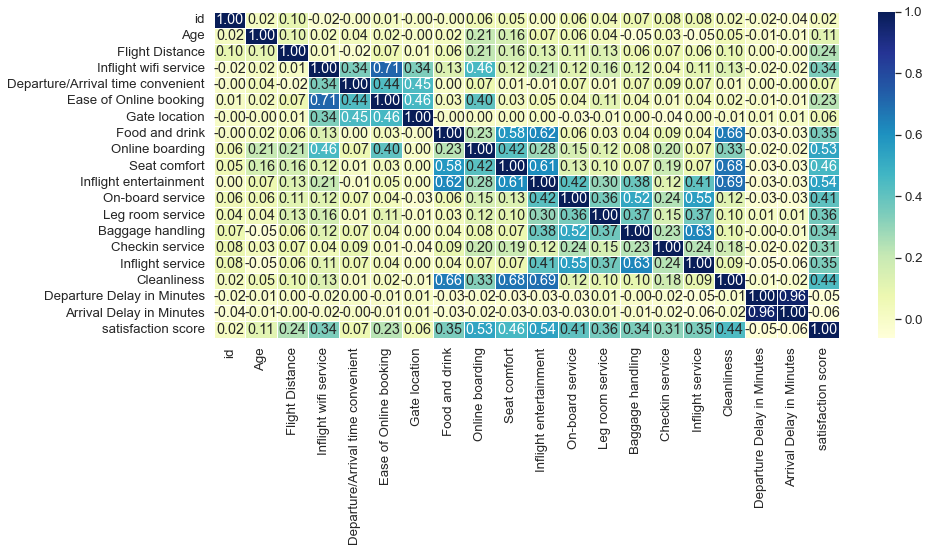

In [45]:
with sns.axes_style('white'):
    plt.figure(figsize= (14, 6))
    sns.heatmap(df_eda.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap = "YlGnBu")

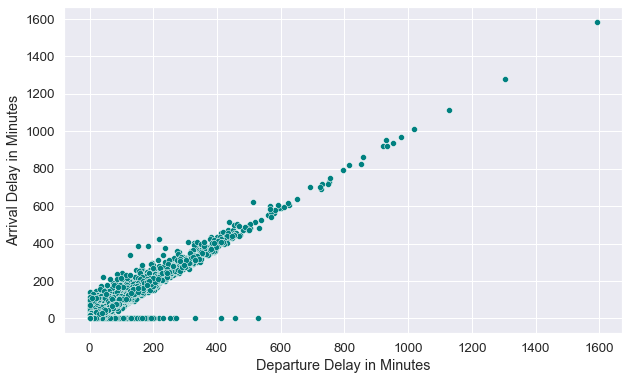

In [46]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df_eda, color = 'teal')
plt.show()

Very strong correlation between Departure and Arrival delay, so maybe one should be dropped

In [47]:
df_eda.drop('Departure Delay in Minutes', axis=1, inplace= True)

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

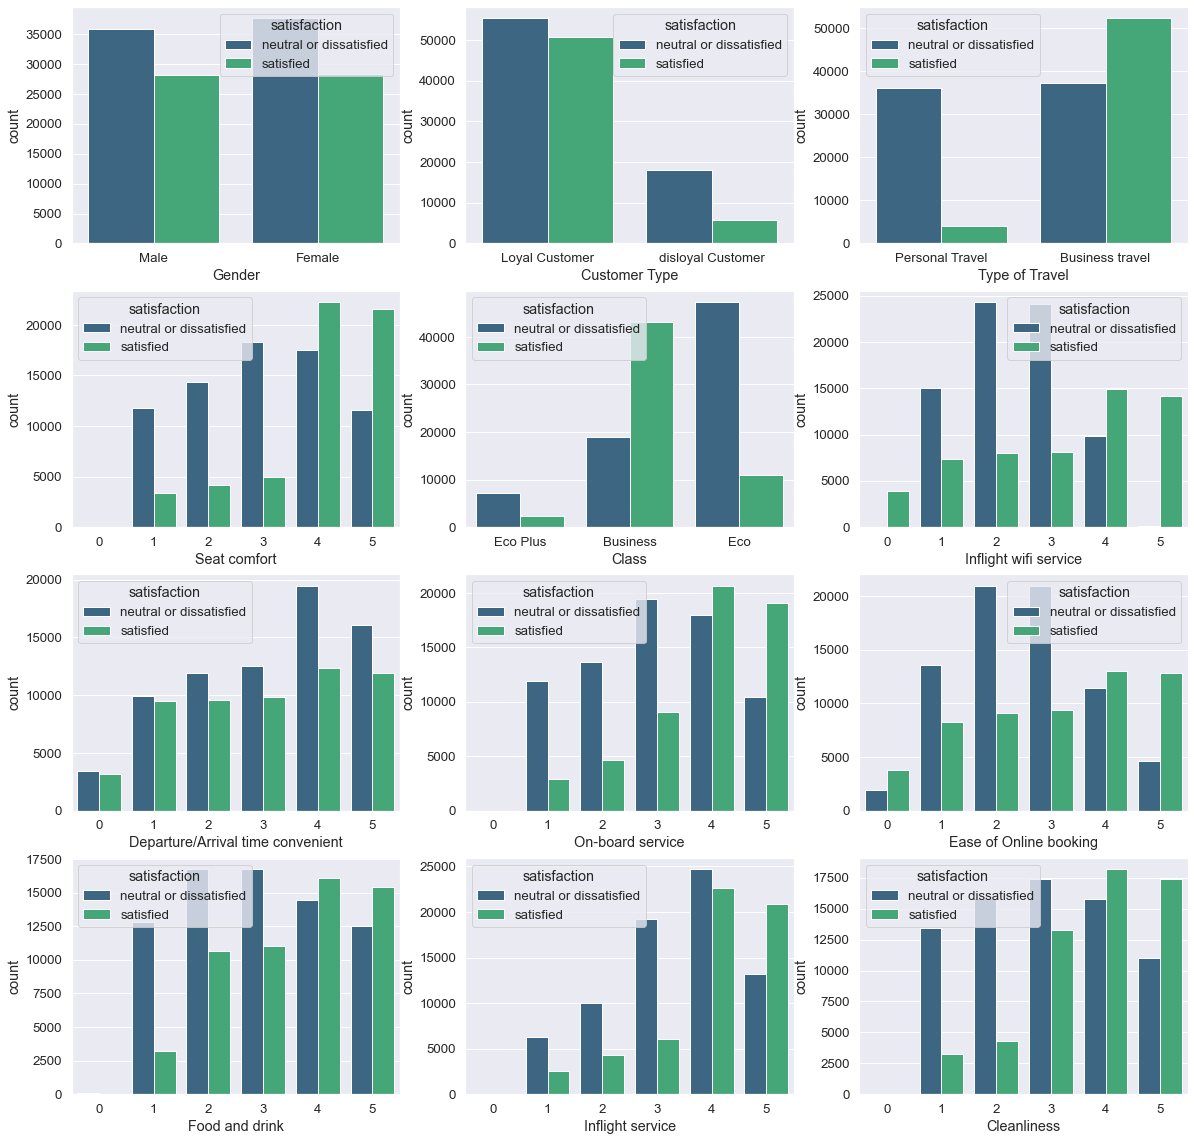

In [48]:
# Finding effect of all each factor on satisfaction


fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = df_eda, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0])
sns.countplot(x = 'Customer Type', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1])
sns.countplot(x = 'Type of Travel', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2])
sns.countplot(x = 'Seat comfort', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0])
sns.countplot(x = 'Class', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1])
sns.countplot(x = 'Inflight wifi service', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2])
sns.countplot(x = 'Departure/Arrival time convenient', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0])
sns.countplot(x = 'On-board service', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1])
sns.countplot(x = 'Ease of Online booking', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2])
sns.countplot(x = 'Food and drink', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0])
sns.countplot(x = 'Inflight service', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1])
sns.countplot(x = 'Cleanliness', data = df_eda, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2])

People travelling for business are more satisfied as compared to people who are travelling for other purposes

Business class people are more satisfied as compared to people travelling in eco class

Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline

(add more statements whatever you observe)

In [49]:
# trying to encode

# df_eda['Gender'] = df_eda['Gender'].map({'Male' : 0, 'Female' : 1})
# df_eda['Customer Type'] = df_eda['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
# df_eda['Type of Travel'] = df_eda['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
# df_eda['Class'] = df_eda['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
# df_eda['satisfaction'] = df_eda['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})